In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,recall_score
from sklearn.tree import plot_tree

<h1 style="font-size:60px; font-weight:bold;"> Project: </h1>

# College Student Placement Prediction ML Analysis 

In [138]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\college_student_placement_dataset.csv")

# Data Info

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [140]:
df.shape

(10000, 10)

In [141]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


# Data Cleaning & Handling

In [142]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [143]:
df.drop(columns=["College_ID"],inplace=True)

# Machine Learning

In [144]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


In [145]:
# Data Preprocessing 
le=LabelEncoder()
ob=df.select_dtypes(include="object")
for col in ob:
    df[col]=le.fit_transform(df[col])

In [146]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0


# Logistic Regression Model

In [147]:
x=df.drop(columns=["Placement"])
y=df["Placement"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
model=LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
acc=accuracy_score(y_test,y_pred)
print(f"The Logistic Regression Model Accuracy Score Is {acc}")

The Logistic Regression Model Accuracy Score Is 0.9035


# Decision Tree Model

In [148]:
modeld=DecisionTreeClassifier()
modeld.fit(x_train,y_train )

DecisionTreeClassifier()

In [149]:
y_pred_d=modeld.predict(x_test)
acc_d=accuracy_score(y_test,y_pred_d)
print(f"The Accuracy Score Of Decision Tree Model Is {acc_d}")

The Accuracy Score Of Decision Tree Model Is 1.0


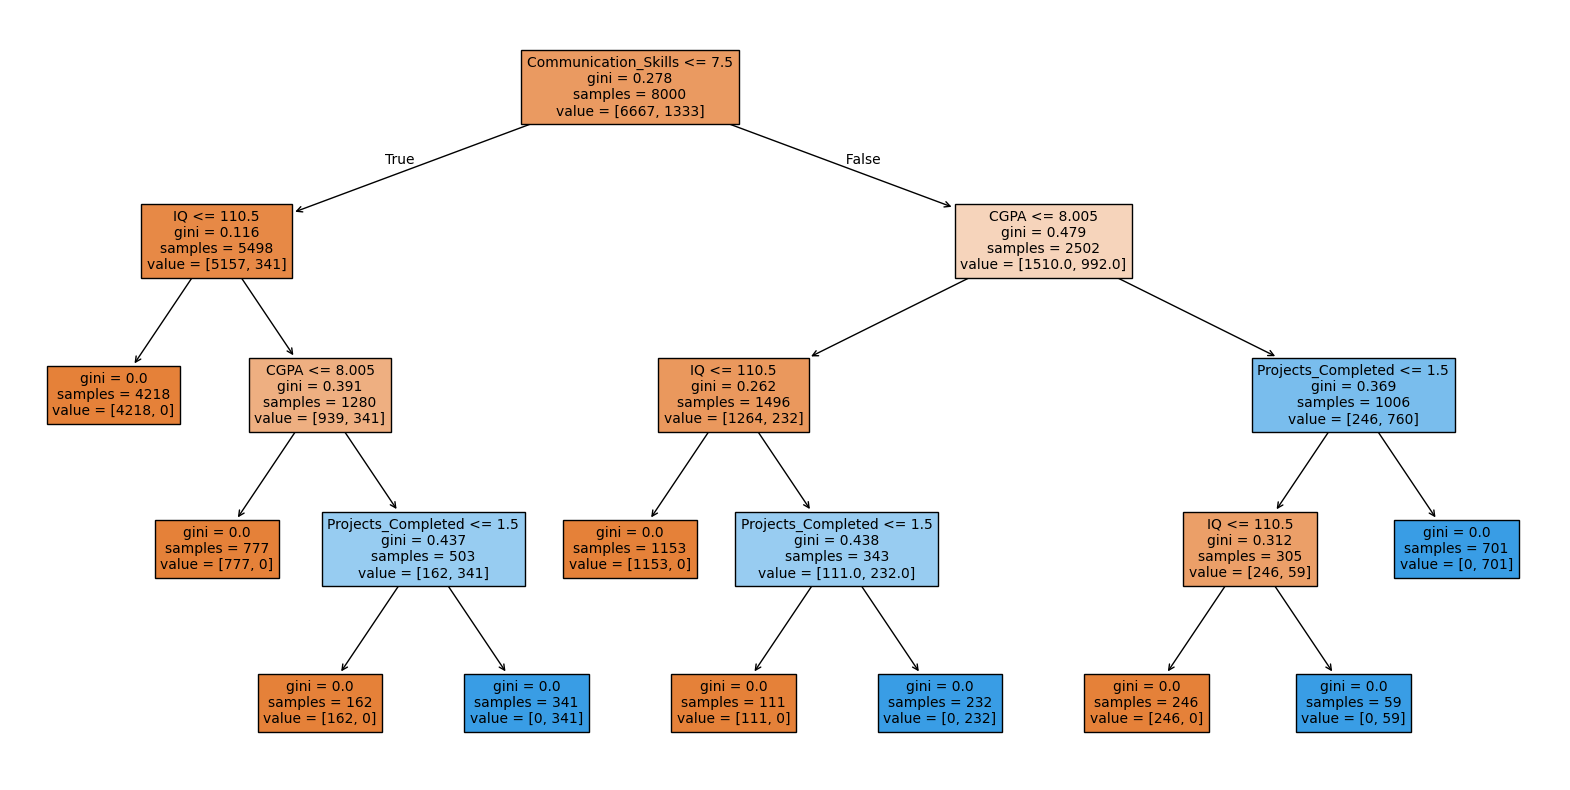

In [150]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))  # Width, Height in inches
plot_tree(modeld, feature_names=x.columns, filled=True, fontsize=10)
plt.show()


# Random Forest Classifier Model 

In [151]:
modelr=RandomForestClassifier()
modelr.fit(x_train,y_train)
y_pred_r=modelr.predict(x_test)
acc_r=accuracy_score(y_test,y_pred)
print(f"The Accuracy Score Of Random Forest Classifier Model Is {acc_r}")

The Accuracy Score Of Random Forest Classifier Model Is 0.9035


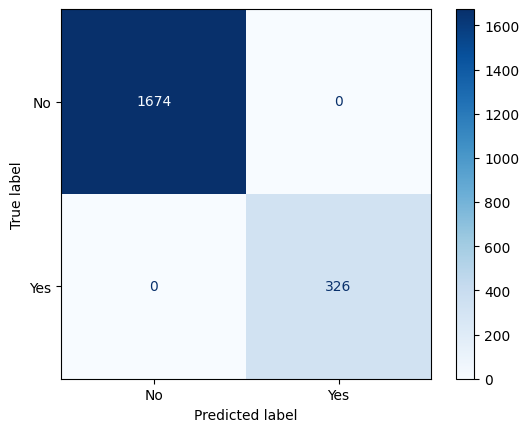

In [152]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_r)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')


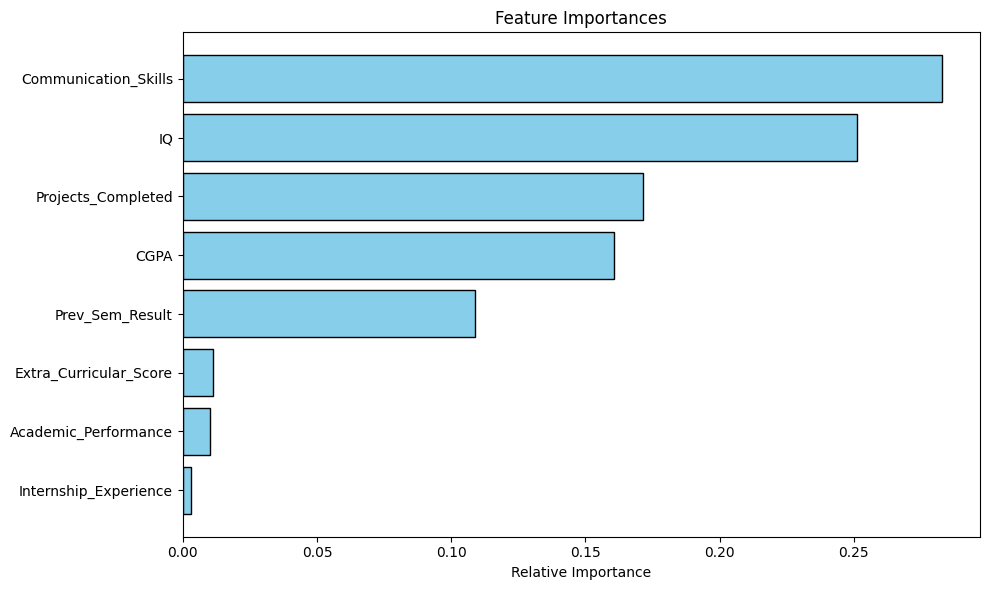

In [ ]:
importances = modelr.feature_importances_
features = x_train.columns

indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="skyblue", edgecolor="black")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()
